# ***Setting up the notebook***

---







# **Importing Libraries**
In this snippet all the libraries required to execute the code are imported.

In [ ]:
import numpy as np
import pandas as pd 
import copy
import datetime as dt
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import cufflinks as cf
cf.go_offline()
import missingno as msn
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

# **Mounting Drive** 
Here the Google Drive access is given to the notebook for accessing the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Path to dataset**
Here we navigate to the directory where the dataset is present.

In [ ]:
%cd /content/drive/MyDrive/DA

/content/drive/MyDrive/DA


# **Importing the dataset**
Here we import the dataset and filter the useful features in the dataset.

In [ ]:
df = pd.read_csv('survey_results_public.csv',usecols=["Country","Student","Gender","Age","Employment","FormalEducation","UndergradMajor","DevType","YearsCoding","EducationTypes","JobSatisfaction","ConvertedSalary","LanguageWorkedWith","LanguageDesireNextYear","DatabaseWorkedWith","FrameworkWorkedWith","IDE","OperatingSystem","HoursComputer"])

# **Columns of the dataset**



In [ ]:
for col in df.columns:
    print(col)

Country
Student
Employment
FormalEducation
UndergradMajor
DevType
YearsCoding
JobSatisfaction
ConvertedSalary
EducationTypes
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
FrameworkWorkedWith
IDE
OperatingSystem
HoursComputer
Gender
Age


In [ ]:
Columns = ['Country : Country of Developer',
'Student: Is Developer Student or Working Professional',
'Employment : Employment Status of Developer',
'FormalEducation : Highest Degree Held By DEveloper (if any)',
'UndergradMajor : Major Subject Choosen by Developer',
'DevType : Developer Type',
'YearsCoding : Years of Experience in Coding',
'JobSatisfaction : Developer satisfaction with his current Job',
'ConvertedSalary : Salary earned by Developer in USD per annum',
'EducationTypes : Resources used by Developer to learn Coding',
'LanguageWorkedWith : Programming Languages programmer is currently working with',
'LanguageDesireNextYear : Programming Languages programmer wants to learn',
'DatabaseWorkedWith : Databases programmer is currently working with',
'FrameworkWorkedWith : Frameworkss programmer is currently working with',
'IDE : IDE Developer Currently using',
'OperatingSystem : OS used by Developer',
'HoursComputer : Hours spent by Developer',
'Gender : Gender of Developer',
'Age : Age in range where developer lies']

for i in Columns:
    print(i)

Country : Country of Developer
Student: Is Developer Student or Working Professional
Employment : Employment Status of Developer
FormalEducation : Highest Degree Held By DEveloper (if any)
UndergradMajor : Major Subject Choosen by Developer
DevType : Developer Type
YearsCoding : Years of Experience in Coding
JobSatisfaction : Developer satisfaction with his current Job
ConvertedSalary : Salary earned by Developer in USD per annum
EducationTypes : Resources used by Developer to learn Coding
LanguageWorkedWith : Programming Languages programmer is currently working with
LanguageDesireNextYear : Programming Languages programmer wants to learn
DatabaseWorkedWith : Databases programmer is currently working with
FrameworkWorkedWith : Frameworkss programmer is currently working with
IDE : IDE Developer Currently using
OperatingSystem : OS used by Developer
HoursComputer : Hours spent by Developer
Gender : Gender of Developer
Age : Age in range where developer lies




---



# **Setting up the dataset**

---



# **Cleaning the dataset**
The code below aims to handle the NULL values in the dataset.

In [ ]:
len(df)

98855

**Dropping Duplicate**

In [ ]:
df.drop_duplicates(keep=False,inplace=True)
len(df)

93813

In [ ]:
df = df[df['ConvertedSalary'].notna()]
df = df[df['FrameworkWorkedWith'].notna()]
df = df[df['UndergradMajor'].notna()]
df = df[df['DatabaseWorkedWith'].notna()]
df = df[df['LanguageDesireNextYear'].notna()]
df = df[df['Gender'].notna()]
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['EducationTypes'].fillna(df['EducationTypes'].mode()[0], inplace=True)
df['JobSatisfaction'].fillna(df['JobSatisfaction'].mode()[0], inplace=True)
df['Student'].fillna(df['Student'].mode()[0], inplace=True)
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
df['DevType'].fillna(df['DevType'].mode()[0], inplace=True)
df['LanguageWorkedWith'].fillna(df['LanguageWorkedWith'].mode()[0], inplace=True)
df['IDE'].fillna(df['IDE'].mode()[0], inplace=True)
df['OperatingSystem'].fillna(df['OperatingSystem'].mode()[0], inplace=True)
df['YearsCoding'].fillna(df['YearsCoding'].mode()[0], inplace=True)
df['HoursComputer'].fillna(df['HoursComputer'].mode()[0], inplace=True)

# **Check for NULL values**
This line of code calculate the number of NULL values in the dataset.

In [ ]:
df.isnull().sum()

Country                   0
Student                   0
Employment                0
FormalEducation           0
UndergradMajor            0
DevType                   0
YearsCoding               0
JobSatisfaction           0
ConvertedSalary           0
EducationTypes            0
LanguageWorkedWith        0
LanguageDesireNextYear    0
DatabaseWorkedWith        0
FrameworkWorkedWith       0
IDE                       0
OperatingSystem           0
HoursComputer             0
Gender                    0
Age                       0
dtype: int64

# **Size of dataset**
The snippet below gives the count of rows, columns in the dataset.

In [ ]:
df.shape

(24585, 19)

# **Data Visualization**

---



#**Word Cloud of countries based on the number of responders**

In [ ]:
df.head()

Country Student  ... Gender                Age
1   United Kingdom      No  ...   Male  35 - 44 years old
5   United Kingdom      No  ...   Male  18 - 24 years old
6    United States      No  ...   Male  18 - 24 years old
8    United States      No  ...   Male  35 - 44 years old
17          Sweden      No  ...   Male  35 - 44 years old

[5 rows x 19 columns]

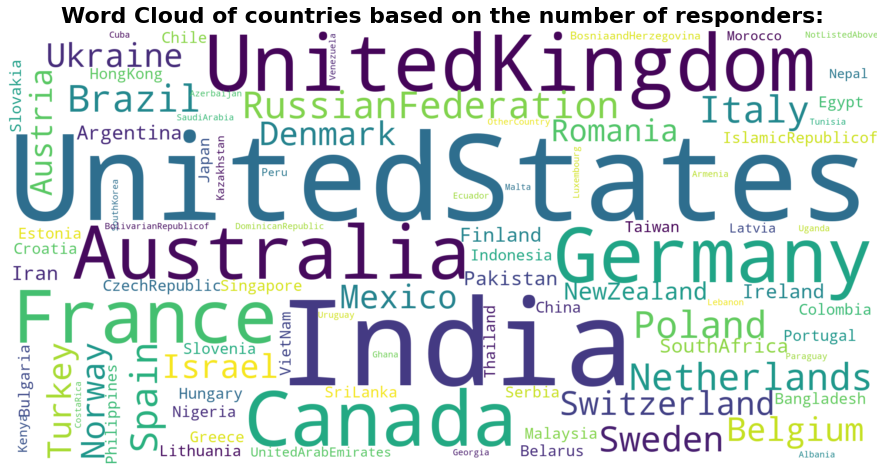

In [ ]:
country = df["Country"].value_counts()[:100].reset_index()
wrds = country["index"].str.replace(" ","")
wc = WordCloud(background_color='white', colormap=cm.viridis, scale=5).generate(" ".join(wrds))
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of countries based on the number of responders:", fontdict={'size':22, 'weight': 'bold'});

# **Bar graph of kinds of students based on the count**

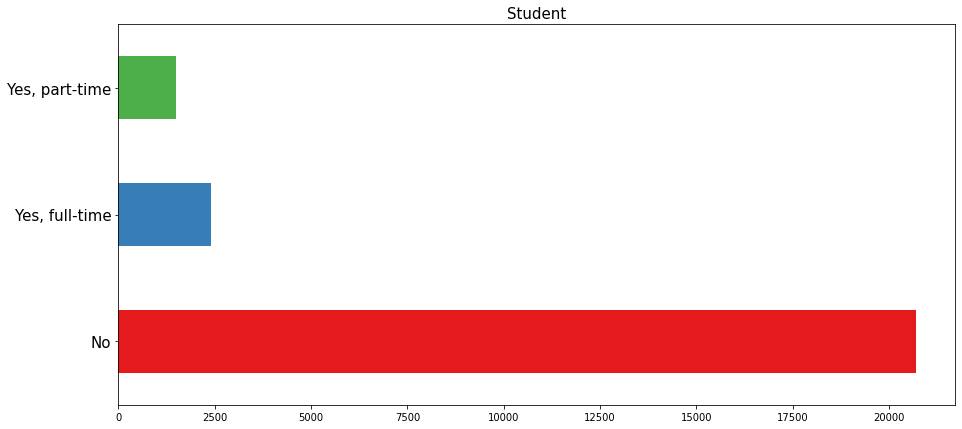

In [ ]:
plt.figure(figsize=(15,7))
colors = ["greyish", "faded green", "dusty purple"]
student_counts = df['Student'].value_counts()
student_counts.plot.barh(color=sns.color_palette("Set1"))
plt.title('Student', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# **Pie chart for the distribution of genders amongst the respondants**

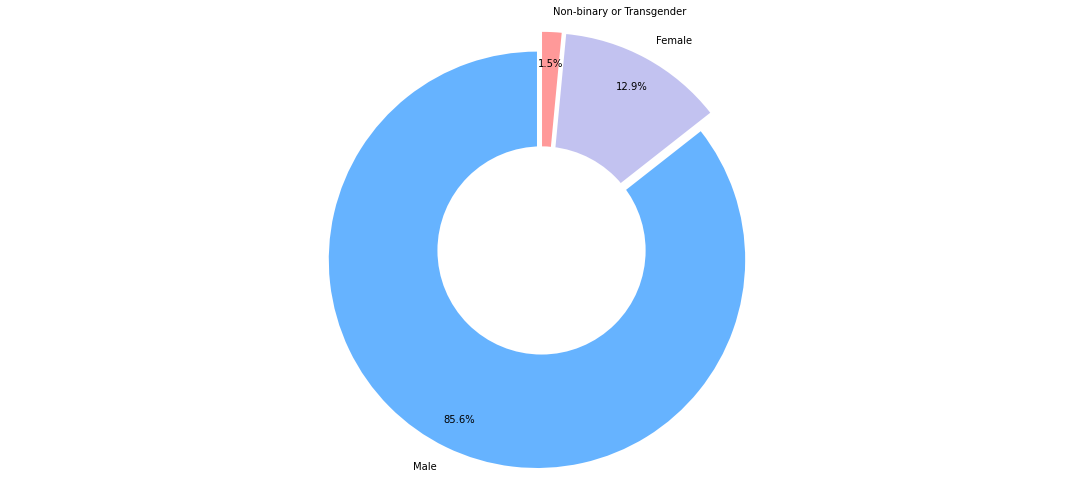

In [ ]:
gen = pd.DataFrame(df['Gender'].dropna().str.split(';').tolist()).stack()
gen=  gen.value_counts().sort_values(ascending=False)
labels = gen.index
labels= 'Male', 'Female', 'Non-binary or Transgender'
f, ax1 = plt.subplots(figsize=(15,7))

sizes = gen/gen.sum() * 100
sizes = [85.594640,12.897822 , 1.5075379]
explode = (0.05,0.05,0.05)
colors= ['#66b3ff','#c2c2f0', '#ff9999']
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()

# **Bar graph for Formal Education of the respondants**

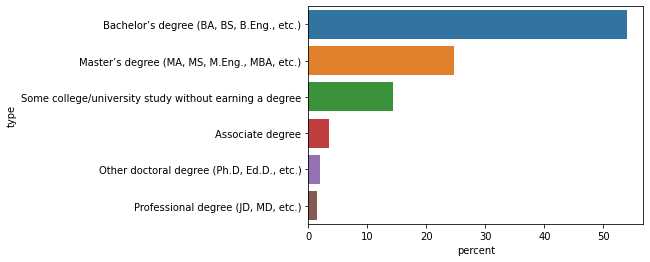

In [ ]:
edu = df['FormalEducation'].value_counts()
edu = pd.DataFrame({'type':edu.index,'percent':(edu.values)*100/sum(edu.values)})
fig = plt.figure()
sns.barplot(edu['percent'],edu['type'])
plt.show()

# **Bar graph for types of developers amongst the respondants**

['Marketing or sales professional',
 'Educator or academic researcher',
 'Game or graphics developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Embedded applications or devices developer',
 'Product manager',
 'Student',
 'Engineering manager',
 'QA or test developer',
 'Data scientist or machine learning specialist',
 'Data or business analyst',
 'Designer',
 'System administrator',
 'DevOps specialist',
 'Database administrator',
 'Desktop or enterprise applications developer',
 'Mobile developer',
 'Front-end developer',
 'Full-stack developer',
 'Back-end developer']

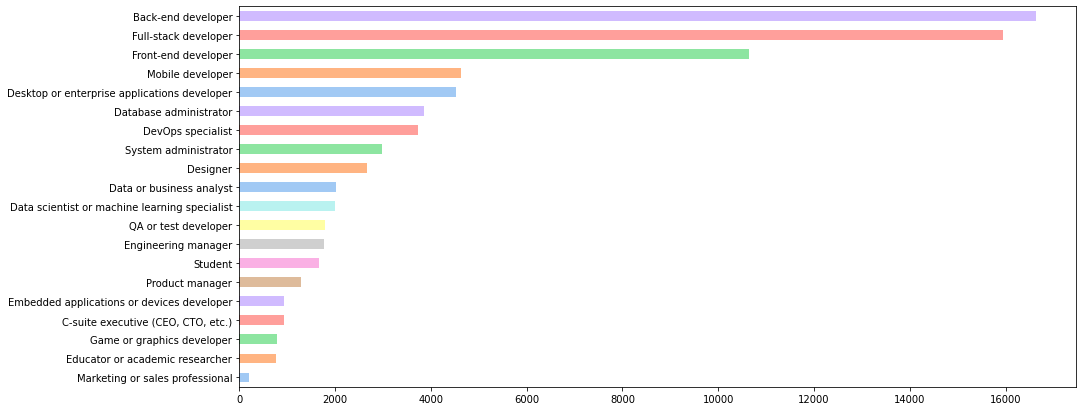

In [ ]:
plt.figure(figsize=(15,7))
temp_devtype = pd.DataFrame(df['DevType'].dropna().str.split(';').tolist()).stack()
temp_devtype_counts = temp_devtype.value_counts().sort_values()
temp_devtype_counts.plot.barh(color=sns.color_palette('pastel',15))
# plt.title('DevType', fontsize=15)
# plt.yticks(fontsize=18)
# plt.show()
list(temp_devtype_counts.index)

# **A chart showing the distribution of salary of all the respondants**

# **Bar graph showing the number of respondants comfortable with different languages**

Hack                       61
Julia                     106
Ocaml                     132
Cobol                     153
Erlang                    342
Clojure                   456
F#                        494
Delphi/Object Pascal      503
Haskell                   645
Rust                      656
Lua                       868
Visual Basic 6            903
Perl                     1035
VBA                      1136
CoffeeScript             1177
Kotlin                   1205
Matlab                   1217
Assembly                 1260
Groovy                   1550
R                        1567
Scala                    1600
Objective-C              1651
VB.NET                   1795
Swift                    1871
Go                       2304
Ruby                     3195
C                        4234
C++                      4899
TypeScript               6626
PHP                      7504
C#                      10177
Python                  10237
Java                    11679
Bash/Shell

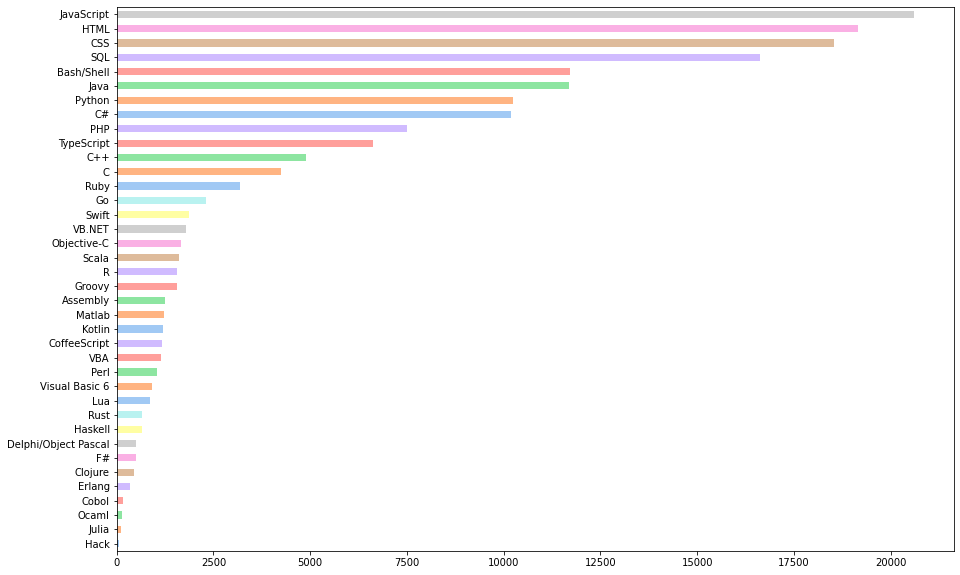

In [ ]:
plt.figure(figsize=(15,10))
temp_language = pd.DataFrame(df['LanguageWorkedWith'].str.split(';').tolist()).stack()
temp_language_counts = temp_language.value_counts().sort_values()
temp_language_counts.plot.barh(color=sns.color_palette('pastel',15))
temp_language_counts
# plt.title('Most Popular Languages', fontsize=15)
# plt.yticks(fontsize=12)
# plt.show()

# **Bar graph showing the number of respondants comfortable with working on different platforms**

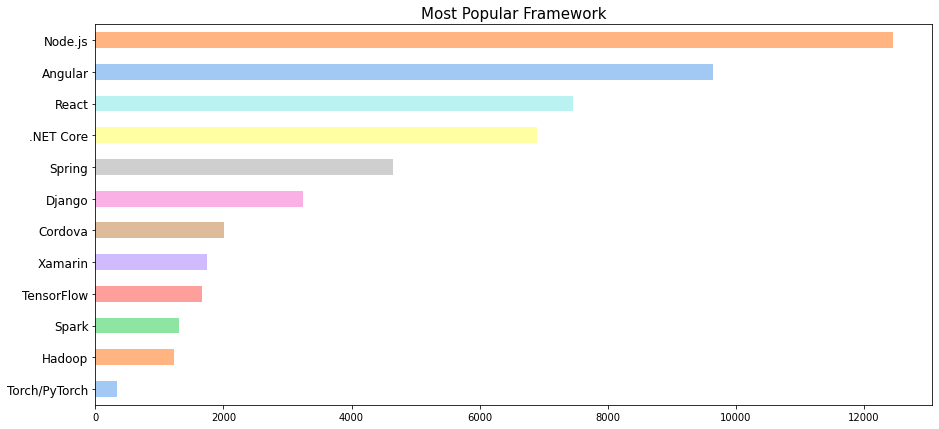

In [ ]:
plt.figure(figsize=(15,7))
temp_framework = pd.DataFrame(df['FrameworkWorkedWith'].dropna().str.split(';').tolist()).stack()
temp_framework_counts = temp_framework.value_counts().sort_values()
temp_framework_counts.plot.barh(color=sns.color_palette('pastel',15))
plt.title('Most Popular Framework', fontsize=15)
plt.yticks(fontsize=12)
plt.show()

# **Bar graph for understanding the most popular IDE for development amongst the respondants**

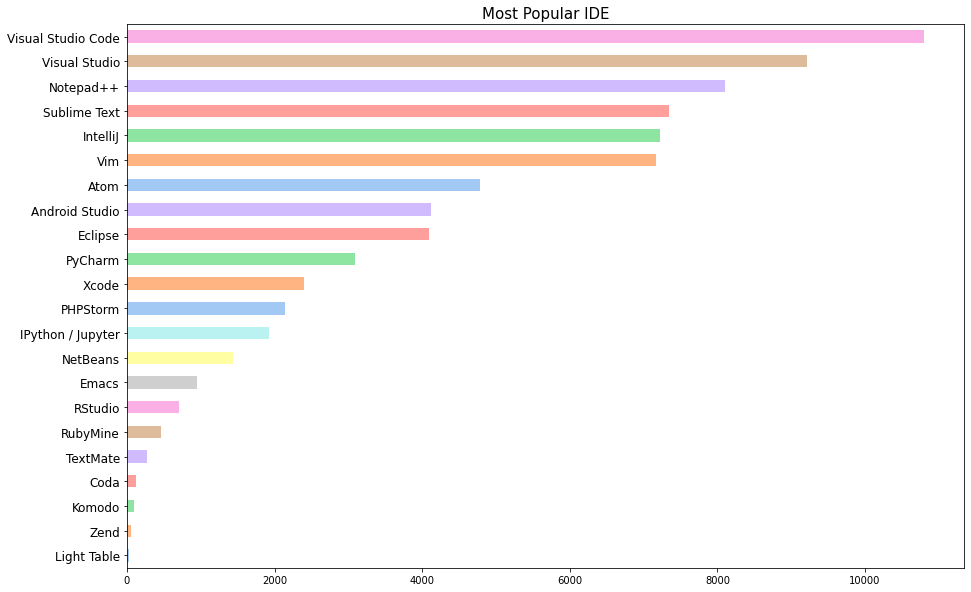

In [ ]:
plt.figure(figsize=(15,10))
temp_ide = pd.DataFrame(df['IDE'].str.split(';').tolist()).stack()
temp_ide_counts = temp_ide.value_counts().sort_values()
temp_ide_counts.plot.barh(color=sns.color_palette("pastel", 15))
plt.title('Most Popular IDE', fontsize=15)
plt.yticks(fontsize=12)
plt.show()

# **Job Satisfaction Study**

---



#**1. Job satisfaction for developers of top countries**


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

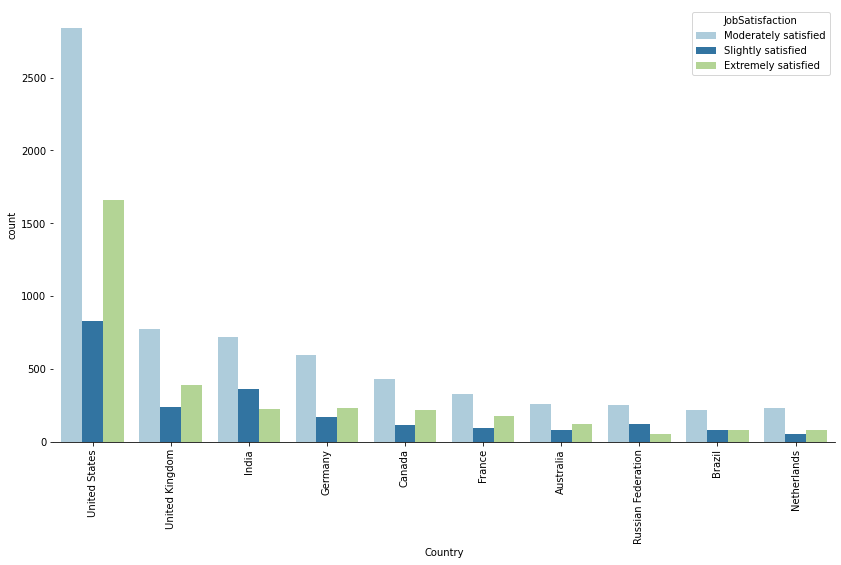

In [ ]:
df['JobSatisfaction'].value_counts()
sat = df[np.logical_or(np.logical_or(df['JobSatisfaction'] == 'Moderately satisfied', df['JobSatisfaction'] == 'Extremely satisfied'), df['JobSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='JobSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

# **2. Various types types vs Job Satisfaction**

In [ ]:
# replace_dict = {
#     'Extremely satisfied': 6,
#     'Moderately satisfied': 5,
#     'Slightly satisfied': 4,
#     'Neither satisfied nor dissatisfied': 3,
#     'Slightly dissatisfied':2,
#     'Moderately dissatisfied': 1,
#     'Extremely dissatisfied': 0
# }
# unique_dev_types = []
# unique_devs = pd.unique(df['DevType'])
# for dev_type in unique_devs.astype('str'):
#     dev_types = dev_type.split(';')
#     unique_dev_types.extend(dev_types)

# unique_dev_types = list(set(unique_dev_types))
# y_ticks = {i: val for val, i in replace_dict.items()}

# for i, dev_type in enumerate(unique_dev_types):
#     if i % 4 == 0:
#         plt.figure(figsize=(15, 10))
#     plt.subplot(2, 2, i % 4 + 1)
#     plt.title('DevType: {} Job Satisfaction'.format(dev_type))
#     tmp = df[df['DevType'].str.contains(dev_type)]['JobSatisfaction']
#     tmp.hist(label=dev_type, orientation='horizontal')
#     plt.yticks(np.arange(7), [y_ticks[i] for i in range(7)])
#     if i % 4 == 3:
#         plt.tight_layout()
#         #plt.legend()
#         plt.show()



---



# **Graph plotting the number of males and females in various age groups**

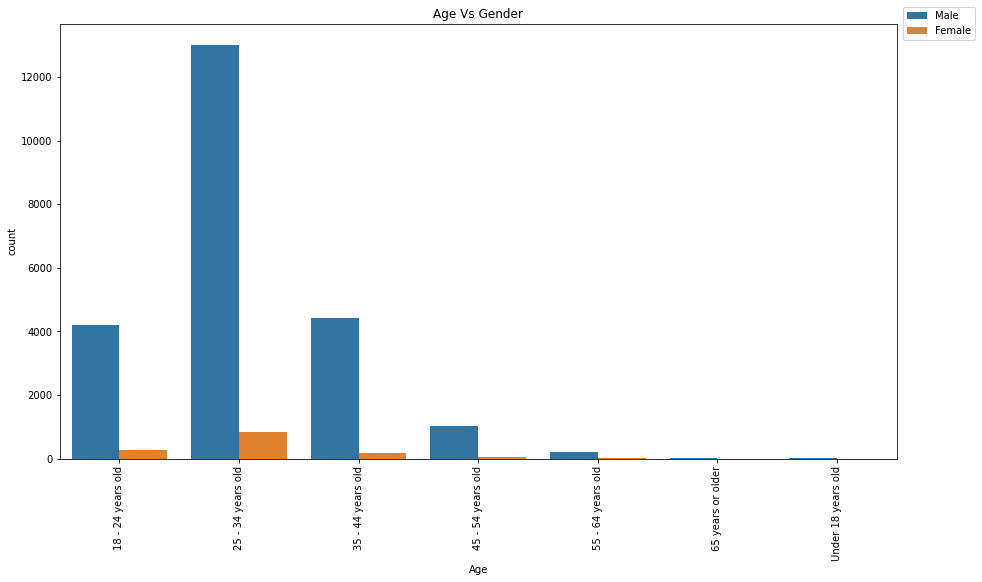

In [ ]:
male_female = df[df["Gender"].isin(['Male', 'Female'])]
plt.figure(figsize=(15,8))
g=sns.countplot(x=male_female['Age'],hue=male_female['Gender'], order=male_female['Age'].dropna().sort_values().unique())
g.set_xlabel("Age")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Age Vs Gender")
plt.show()

# **A graph that depicts the number of males and females earning various amounts of salaries**

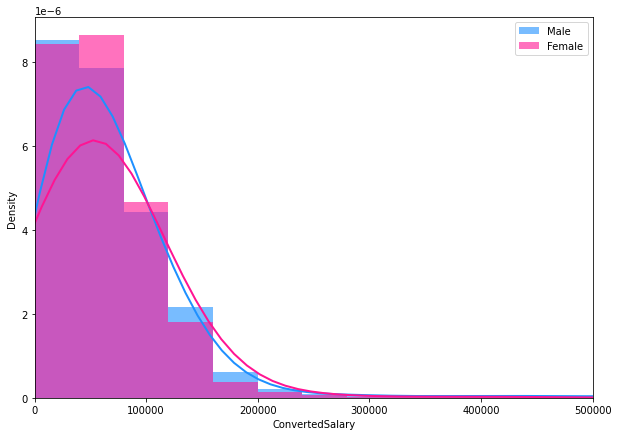

In [ ]:
x1 = df.loc[df.Gender=='Male', 'ConvertedSalary']
x2 = df.loc[df.Gender=='Female', 'ConvertedSalary']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7))
sns.distplot(x1, color="dodgerblue", label="Male", **kwargs)
sns.distplot(x2, color="deeppink", label="Female", **kwargs)
plt.xlim(0,500000)
plt.legend();

In [ ]:
# plt.figure(figsize=(16,5))
# sns.distplot(df['ConvertedSalary'])

# plt.show()

# **Salary v/s Formal Education Plot**

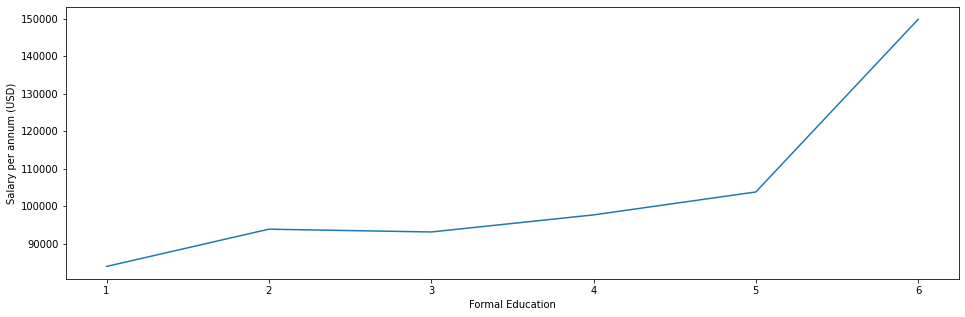

0.8272119153095439

In [ ]:
df1 = df.copy()
plt.figure(figsize=(16,5))
df1['FormalEducation'].replace({'Some college/university study without earning a degree':3,'Bachelor’s degree (BA, BS, B.Eng., etc.)':4, 'Professional degree (JD, MD, etc.)':1, 'Associate degree':2, 'Master’s degree (MA, MS, M.Eng., MBA, etc.)':5, 'Other doctoral degree (Ph.D, Ed.D., etc.)':6},inplace=True)
df1 = df1.groupby('FormalEducation', as_index=False)['ConvertedSalary'].mean()
plt.plot(df1['FormalEducation'],df1['ConvertedSalary'])
plt.xlabel("Formal Education")
plt.ylabel("Salary per annum (USD)")
plt.show()
df1['FormalEducation']. corr(df1['ConvertedSalary'])

# Delete Noisy Data

In [ ]:
df = df[df['Age'] != 'Under 18 years old']
df = df[df['Age'] != '65 years or older']
df = df[df["Country"].isin(['India', 'United States', 'Germany', 'United Kingdom','France','Canada','Spain','Australia','Israel'])]
df['Age'] = df['Age'].map({'18 - 24 years old':1, '25 - 34 years old':2, '35 - 44 years old':3, '45 - 54 years old':4, '55 - 64 years old':5}).astype(int)
df['YearsCoding'] = df['YearsCoding'].map({'0-2 years':1,'3-5 years':2, '6-8 years':3, '9-11 years':4, '12-14 years':5, '15-17 years':6, '18-20 years':7,'21-23 years':8,'24-26 years':9,'27-29 years':10,'30 or more years':11}).astype(int)
df['Country'] = df['Country'].map({'India':1,'Spain':2, 'France':3,'Germany':4,'Canada':5,'United Kingdom':6,'Australia':7,'Israel':8,'United States':9}).astype(int)
df['HoursComputer'] = df['HoursComputer'].map({'Less than 1 hour':1,'1 - 4 hours':2, '5 - 8 hours':3, '9 - 12 hours':4, 'Over 12 hours':5}).astype(int)

# df.head()

# **Distibution based on Salary**

Shape Dataset:	(14701, 20)


Text(0.5, 0, 'Annual salary')

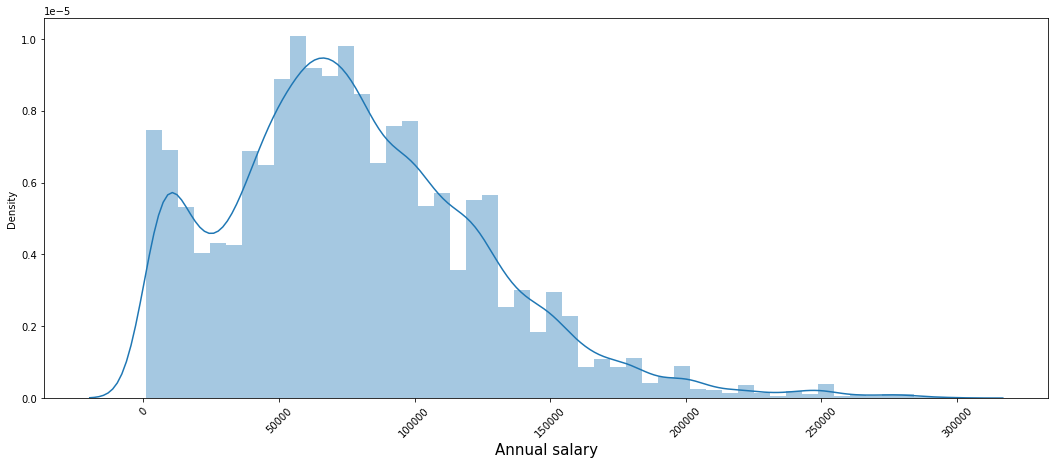

In [ ]:
# MAX_LIM = df.loc[:, 'ConvertedSalary'].quantile(0.95)

# fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(20, 8));

# sns.kdeplot(df.loc[df['ConvertedSalary']<MAX_LIM, 'ConvertedSalary'], ax=axes, shade=True);
# axes.set_title("Salary of Developers(USD per annum)", fontdict={'weight': 'bold', 'size': 24});
# Create subplots
# fig, axarr = plt.subplots(2, figsize=(15,7.5))

# Create histogram
# df['ConvertedSalary'].hist(bins=100, ax=axarr[0])
# axarr[0].set_title('Salary Histogram')
# axarr[0].set_xlabel('Salary')
# axarr[0].set_ylabel('Count')

# Create sorted plot
# df['ConvertedSalary'].sort_values().reset_index(drop=True).plot(ax=axarr[1])
# axarr[1].set_title('Ordered Salaries')
# axarr[1].set_xlabel('Ordered Index')
# axarr[1].set_ylabel('Salary')

# plt.tight_layout()
# plt.show()
df = df[(df['ConvertedSalary']>1000) & (df['ConvertedSalary']<300000)]
print('Shape Dataset:\t{}'.format(df.shape))

f, ax = plt.subplots(figsize=(18, 7))
plt.xticks(rotation='45')
sns.distplot(df['ConvertedSalary']);
plt.xlabel('Annual salary', fontsize=15)

# **Salary v/s Coding Experience Plot**

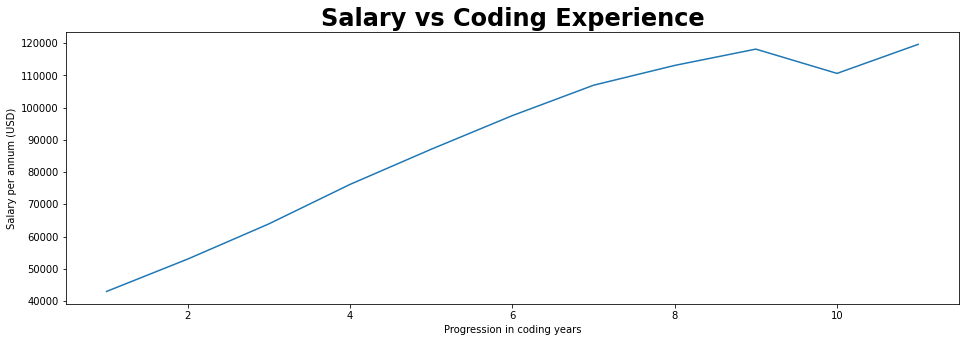

0.9623182697873609

In [ ]:
df1 = df.copy()
plt.figure(figsize=(16,5))
# df1['YearsCoding'].replace({'0-2 years':1,'3-5 years':2, '6-8 years':3, '9-11 years':4, '12-14 years':5, '15-17 years':6, '18-20 years':7,'21-23 years':8,'24-26 years':9,'27-29 years':10,'30 or more years':11},inplace=True)
df1 = df1.groupby('YearsCoding', as_index=False)['ConvertedSalary'].mean()
plt.plot(df1['YearsCoding'],df1['ConvertedSalary'])
plt.title("Salary vs Coding Experience",fontdict={'weight': 'bold', 'size': 24})
plt.xlabel("Progression in coding years")
plt.ylabel("Salary per annum (USD)")
plt.show()
df1['YearsCoding']. corr(df1['ConvertedSalary'])

In [ ]:
df['FormalEducation'].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Associate degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)'], dtype=object)

# **Salary v/s Gender Correlation**

In [ ]:
x=[]
y=[]
for ind in df.index:
  if(df['Gender'][ind] == 'Male'):
    
    x.append(0)
    y.append(df['ConvertedSalary'][ind])
  elif(df['Gender'][ind] == 'Female'):
    x.append(1)
    y.append(df['ConvertedSalary'][ind])

import scipy.stats as stats
stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=-0.025996211986464294, pvalue=0.0017682824226259906)

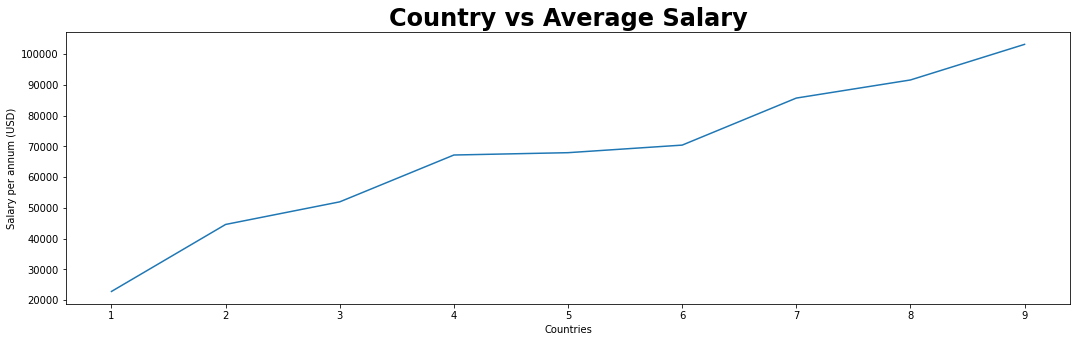

0.977713115467354

In [ ]:
df1 = df.copy()
plt.figure(figsize=(18,5))
# df1 = df1[df1["Country"].isin(['India', 'United States', 'Germany', 'United Kingdom','France','Canada','Spain','Australia','Israel'])]
# df1['Country'].replace({'India':1,'Spain':2, 'France':3,'Germany':4,'Canada':5,'United Kingdom':6,'Australia':7,'Israel':8,'United States':10},inplace=True)
df1 = df1.groupby('Country', as_index=False)['ConvertedSalary'].mean()
df1 = df1.sort_values('ConvertedSalary')
# plt.bar(df1['Country'],df1['ConvertedSalary'],color="rgbkymc")
plt.plot(df1['Country'],df1['ConvertedSalary'])
plt.xlabel("Countries")
plt.ylabel("Salary per annum (USD)")
plt.title("Country vs Average Salary",fontdict={'weight': 'bold', 'size': 24})
plt.show()
df1['Country']. corr(df1['ConvertedSalary'])

# **Countrywise Average Salary**

# **Commented Section**

In [ ]:
# male_female = df[df["Gender"]=="Male" and df["Gender"]=="Female"]
# male_female.value_counts()
# sat = df[np.logical_or(np.logical_or(male_female['JobSatisfaction'] == 'Moderately satisfied', male_female['JobSatisfaction'] == 'Extremely satisfied'), male_female['JobSatisfaction'] == 'Slightly satisfied')]

# plt.figure(figsize=(14, 8))
# sns.countplot(data=sat, x='Country', hue='JobSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)
# sns.despine(left=True)
# plt.xticks(rotation='vertical')

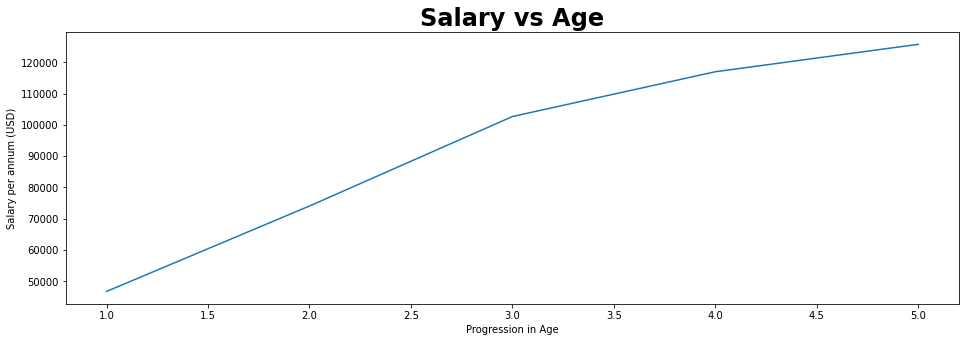

0.9587384891775729

In [ ]:
# my_df = df.copy()
# my_df['Age'].replace({'Under 18 years old':16.0,'18 - 24 years old':21.0, '25 - 34 years old':29.5, '35 - 44 years old':39.5, '45 - 54 years old':49.5, '55 - 64 years old':59.5, '65 years or older':70.0},inplace=True)
# corrMatrix = my_df['Age'].corr(my_df['ConvertedSalary'])
# print (corrMatrix)
# # x = my_df['Age']
# plt.plot(my_df['Age'],my_df['ConvertedSalary'])
# # my_df['Age'] = my_df['Age'] .astype(float)
# # my_df.dtypes

# male_female = df[df["Gender"].isin(['Male', 'Female'])]

df['Age'].unique()
df_age = df.copy()
plt.figure(figsize=(16,5))
df_age = df_age.groupby('Age', as_index=False)['ConvertedSalary'].mean()
plt.plot(df_age['Age'],df_age['ConvertedSalary'])
plt.title("Salary vs Age",fontdict={'weight': 'bold', 'size': 24})
plt.xlabel("Progression in Age")
plt.ylabel("Salary per annum (USD)")
plt.show()
df_age['Age']. corr(df1['ConvertedSalary'])

In [ ]:
# df['UndergradMajor'].unique()
# df_undergrad = df.copy()
# df_undergrad = df_undergrad.groupby('UndergradMajor', as_index=False)['ConvertedSalary'].mean()
# df_undergrad = df_undergrad.sort_values('ConvertedSalary')
# plt.figure(figsize=(50,5))
# plt.bar(df_undergrad['UndergradMajor'],df_undergrad['ConvertedSalary'])
# plt.title("Salary vs Undergrad Major",fontdict={'weight': 'bold', 'size': 24})
# plt.xlabel("Undergrad Major")
# plt.ylabel("Salary per annum (USD)")
# plt.show()

In [ ]:
df['DevType'].unique()
# df_devtype = df.copy()
# df_devtype = df_devtype.groupby('DevType', as_index=False)['ConvertedSalary'].mean()
# df_devtype = df_devtype.sort_values('ConvertedSalary')
# plt.figure(figsize=(50,5))
# plt.bar(df_devtype['DevType'],df_devtype['ConvertedSalary'])
# plt.title("Salary vs Developer Type",fontdict={'weight': 'bold', 'size': 24})
# plt.xlabel("Developer type")
# plt.ylabel("Salary per annum (USD)")
# plt.show()

array(['Database administrator;DevOps specialist;Full-stack developer;System administrator',
       'Back-end developer;Database administrator;Front-end developer;Full-stack developer',
       'Back-end developer;Front-end developer;Full-stack developer', ...,
       'C-suite executive (CEO, CTO, etc.);DevOps specialist;Engineering manager;Front-end developer;Full-stack developer',
       'Back-end developer;Database administrator;Designer;Desktop or enterprise applications developer;DevOps specialist;Front-end developer;Full-stack developer;Student;System administrator',
       'Back-end developer;Data or business analyst;Designer;Desktop or enterprise applications developer;Front-end developer;Student'],
      dtype=object)

In [ ]:
first_bracket = "From 1k to 21k"
second_bracket = "From 21k to 41k"
third_bracket = "From 41k to 61k"
forth_bracket = "From 61k to 81k"
fifth_bracket = "From 81k to 101k"
sixth_bracket = "From 101k to 121k"
seventh_bracket = "From 121k to 141k"
eigth_bracket = "From 141k to 161k"
ninth_bracket = "From 161k to 181k"
tenth_bracket = "From 181k to 201k"
eleventh_bracket = "From 201k to 221k"
twelfth_bracket = "From 221k to 241k"
thirteenth_bracket = "From 241k to 261k"
fourteenth_bracket = "From 261k to 281k"
fifteenth_bracket = "From 281k to 301k"

df['SalaryRange'] = pd.cut(df['ConvertedSalary'], bins=[1000,21000,41000,61000,81000,101000,121000,141000,161000,181000,201000,221000,241000,261000,281000,301000], labels=[first_bracket, second_bracket, third_bracket,forth_bracket,fifth_bracket,sixth_bracket,seventh_bracket,eigth_bracket,ninth_bracket,tenth_bracket,eleventh_bracket,twelfth_bracket,thirteenth_bracket,fourteenth_bracket,fifteenth_bracket])
# df = df[df.columns.difference(['ConvertedSalary'])];


In [ ]:
df.head()

Country Student          Employment  ... Gender Age        SalaryRange
1         6      No  Employed full-time  ...   Male   3    From 61k to 81k
5         6      No  Employed full-time  ...   Male   1    From 41k to 61k
6         9      No  Employed full-time  ...   Male   1  From 101k to 121k
8         9      No  Employed full-time  ...   Male   3  From 241k to 261k
20        7      No  Employed full-time  ...   Male   3   From 81k to 101k

[5 rows x 20 columns]

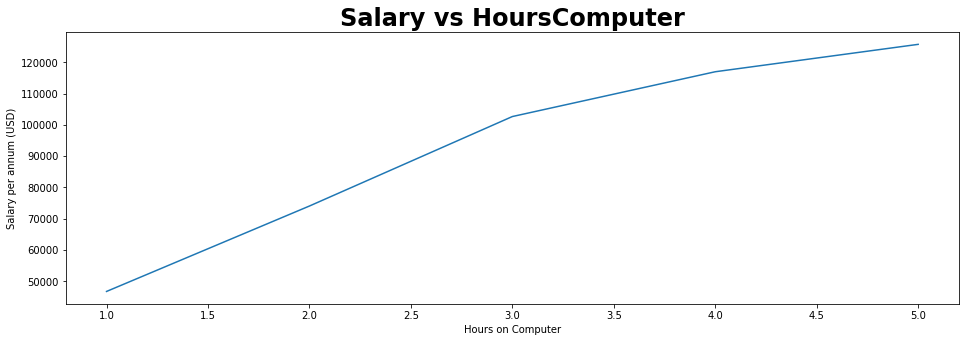

In [ ]:
df['HoursComputer'].unique()
df_comp = df.copy()
plt.figure(figsize=(16,5))
# df_comp['HoursComputer'].replace({'Less than 1 hour':1,'1 - 4 hours':2, '5 - 8 hours':3, '9 - 12 hours':4, 'Over 12 hours':5},inplace=True)
df_comp = df_comp.groupby('HoursComputer', as_index=False)['ConvertedSalary'].mean()
plt.plot(df_age['Age'],df_age['ConvertedSalary'])
plt.title("Salary vs HoursComputer",fontdict={'weight': 'bold', 'size': 24})
plt.xlabel("Hours on Computer")
plt.ylabel("Salary per annum (USD)")
plt.show()
# df_comp['HoursComputer']. corr(df1['ConvertedSalary'])

In [ ]:
x = df[['Age','YearsCoding','Country','HoursComputer']]
y = df['ConvertedSalary']

In [ ]:
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape
# y_train.shape
# y_test

(11025, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
predicted=regressor.predict(x_test)

In [ ]:

dframe=pd.DataFrame({'ActualSalary':y_test,'PredictedSalary':price_svr})
dframe.head()
# y_test.shape

ActualSalary  PredictedSalary
38326       11741.0      8159.478867
70457       80700.0     79167.340013
49359       36115.0     73966.855201
73952       24000.0     17823.024705
63877      120000.0     94420.331800

In [ ]:
dframe['ActualSalaryRange'] = pd.cut(dframe['ActualSalary'], bins=[1000,25000,50000,75000,100000,150000,200000,300000], labels=[first_bracket, second_bracket, third_bracket,forth_bracket,fifth_bracket,sixth_bracket,seventh_bracket])
dframe['PredictedSalaryRange'] = pd.cut(dframe['PredictedSalary'], bins=[1000,25000,50000,75000,100000,150000,200000,300000], labels=[first_bracket, second_bracket, third_bracket,forth_bracket,fifth_bracket,sixth_bracket,seventh_bracket])
# dframe.head(50)

In [ ]:
# for i in range(len(dframe.shape[0])):
#   if(dframe[i]['ActualSalaryRange']==dframe[i]['A'])
seriesObj = dframe.apply(lambda x: True if x['ActualSalaryRange'] == x['PredictedSalaryRange'] else False , axis=1)
num = len(seriesObj[seriesObj == True].index)
num/dframe.shape[0]*100
# dframe.shape[0]


47.90533188248096

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(x_train)
# y_training = y_train.iloc[0:].values
# y_training= np.array(y_training).reshape(-1,1)
# y = sc_y.fit_transform(y_training.reshape(-1,1))
model_svr_regr = make_pipeline(StandardScaler(),  SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1))
model_svr_regr.fit(x_train, y_train)
price_svr=model_svr_regr.predict(x_test)
print(price_svr)

[  8159.478867    79167.3400128   73966.85520129 ...  94270.01592811
  70308.60409466 126647.93335187]


In [ ]:
# from sklearn.svm import SVR
# regressor = SVR(kernel = "rbf")
# regressor.fit(X,y)

SVR()

In [ ]:
# plt.scatter(X, y , color="red")
# plt.plot(X, regressor.predict(X), color="blue")
# plt.title("SVR")
# plt.xlabel("Position")
# plt.ylabel("Salary")
# plt.show()
# predicted=regressor.predict(x_test)
# predicted = sc_y.inverse_transform(predicted.reshape(-1,1))
# predicted.reshape((1,-1))

array([[80735.99271318, 63041.83468719, 63048.51163772, ...,
        63041.83269068, 63041.83304885, 63041.82977807]])

In [ ]:
from sklearn import linear_model
model_r = linear_model.Ridge(normalize= True, alpha= 0.001)
model_r.fit(x_train,y_train)
priceridge = model_r.predict(x_test)
print(priceridge)

[ 14315.81915634  86192.53785584  77308.27750193 ...  98735.52904176
  81029.4514752  129714.04732561]


In [ ]:
dframe_ridge=pd.DataFrame({'ActualSalary':y_test,'PredictedSalary':priceridge})
dframe_ridge['ActualSalaryRange'] = pd.cut(dframe_ridge['ActualSalary'], bins=[1000,25000,50000,75000,100000,150000,200000,300000], labels=[first_bracket, second_bracket, third_bracket,forth_bracket,fifth_bracket,sixth_bracket,seventh_bracket])
dframe_ridge['PredictedSalaryRange'] = pd.cut(dframe_ridge['PredictedSalary'], bins=[1000,25000,50000,75000,100000,150000,200000,300000], labels=[first_bracket, second_bracket, third_bracket,forth_bracket,fifth_bracket,sixth_bracket,seventh_bracket])
seriesObj = dframe_ridge.apply(lambda x: True if x['ActualSalaryRange'] == x['PredictedSalaryRange'] else False , axis=1)
num = len(seriesObj[seriesObj == True].index)
num/dframe_ridge.shape[0]*100
# dframe.head(50)

42.35582154515778

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# Tree_Model = DecisionTreeRegressor()